# Breast Cancer Dataset Wisconsin

## Overview
- 569 data samples in the dataset (357 benign – 212 malignant)
- 30 Features computed from Digitalized Images 

### Origins
- Results of the efforts made at the University of Wisconsin Hospital. 
- Extraction from a breast mass using a small-gauge needle and then visual inspection of the fluid under a microscope.

### Main goal
Predict whether the cancer is benign or malignant

## Features
30 Featuers resulted from The "mean", "standard error" and "worst" or largest (mean of the three largest values) of the following features which computed for each of the images:

- radius: 	mean of distances from center to points on the perimeter
- texture 	standard deviation of gray-scale values
- perimeter	
- area	
- smoothness: 	local variation in radius lengths
- compactness: 	perimeter^2 / area - 1.0
- concavity: 	severity of concave portions of the contour
- concave points:	number of concave portions of the contour
- symmetry:	
- fractal dimension:	"coastline approximation" - 1


In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
cancer = load_breast_cancer();
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


## Plot the Scatter of first two Features

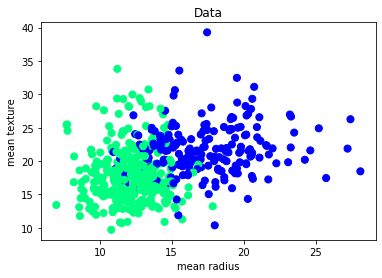

In [3]:
X_train, X_test, Y_train,Y_test = train_test_split(cancer.data,cancer.target,test_size=0.10)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=50, cmap='winter');

plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title("Data");

## Principle Componenet Analysis 
To reduce the dimension of our space which contain 30 features, we use principle component analysis (PCA) which gives us hint which features are more or less important than others so we can select features.
In the following code, we use the number of components is 2 which means two dimensions:

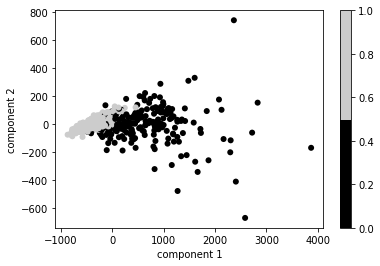

In [4]:
pca = PCA(n_components=2) 
cancer_pca = pca.fit_transform(cancer.data)
plt.scatter(cancer_pca[:, 0], cancer_pca[:, 1],
            c=cancer.target, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('nipy_spectral', 2))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [5]:
import pandas as pd
comps = pd.DataFrame(pca.components_, columns = cancer.feature_names)

comps

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.005086,0.002197,0.035076,0.516826,0.000004,0.000041,0.000082,0.000048,0.000007,-0.000003,...,0.007155,0.003067,0.049458,0.852063,0.000006,0.000101,0.000169,0.000074,0.000018,0.000002
1,0.009287,-0.002882,0.062748,0.851824,-0.000015,-0.000003,0.000075,0.000046,-0.000025,-0.000016,...,-0.000569,-0.013215,-0.000186,-0.519742,-0.000077,-0.000256,-0.000175,-0.000031,-0.000157,-0.000055


### Heatmap 
Using the correlation table that we found above between all the features and the two components we can visualize the heatmap as following:

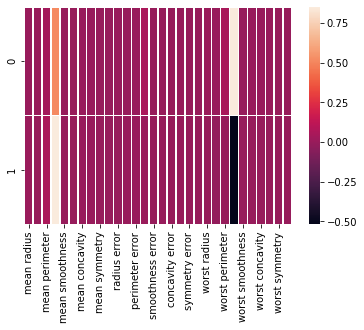

In [6]:
import seaborn as sb
sb.heatmap(comps,annot=False,linewidths = .5)

_Note:_ tha black color in this heat map show a strong negative correlation between a feature and the component1, while the page color shows strong positive correlation between a feature and a component. 

## Features Ranking 
We can compute the features importances using forests of trees with the help of _ExtraTreesClassifier_. 
For more info refer to http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html 


1. feature 27 worst concave points (0.123613)
2. feature 20 worst radius (0.102393)
3. feature 23 worst area (0.090718)
4. feature 22 worst perimeter (0.073362)
5. feature 7 mean concave points (0.069074)
6. feature 0 mean radius (0.057682)
7. feature 2 mean perimeter (0.057616)
8. feature 6 mean concavity (0.055987)
9. feature 3 mean area (0.052329)
10. feature 26 worst concavity (0.042248)
11. feature 25 worst compactness (0.027331)
12. feature 21 worst texture (0.024081)
13. feature 1 mean texture (0.023992)
14. feature 13 area error (0.023794)
15. feature 12 perimeter error (0.021898)
16. feature 24 worst smoothness (0.019354)
17. feature 10 radius error (0.017798)
18. feature 5 mean compactness (0.017481)
19. feature 28 worst symmetry (0.014939)
20. feature 4 mean smoothness (0.011544)
21. feature 29 worst fractal dimension (0.010375)
22. feature 17 concave points error (0.009089)
23. feature 16 concavity error (0.008688)
24. feature 15 compactness error (0.007596)
25. feature 8 m

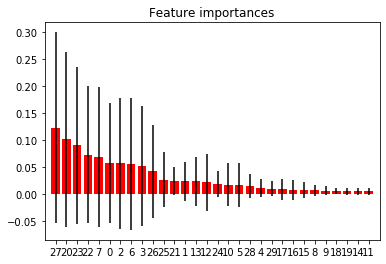

In [7]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(cancer.data, cancer.target)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(cancer.data.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1,  indices[f],cancer.feature_names[indices[f]] , importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(cancer.data.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(cancer.data.shape[1]), indices)
plt.xlim([-1, cancer.data.shape[1]])
plt.show()

### Plotting Top 8 Important Features 
To see the correlation between the top 8 features that we selected in previous step we can use the power of _seaborn_ library as following, notice that the _index_ here refer to the targets/labels column in the dataset:


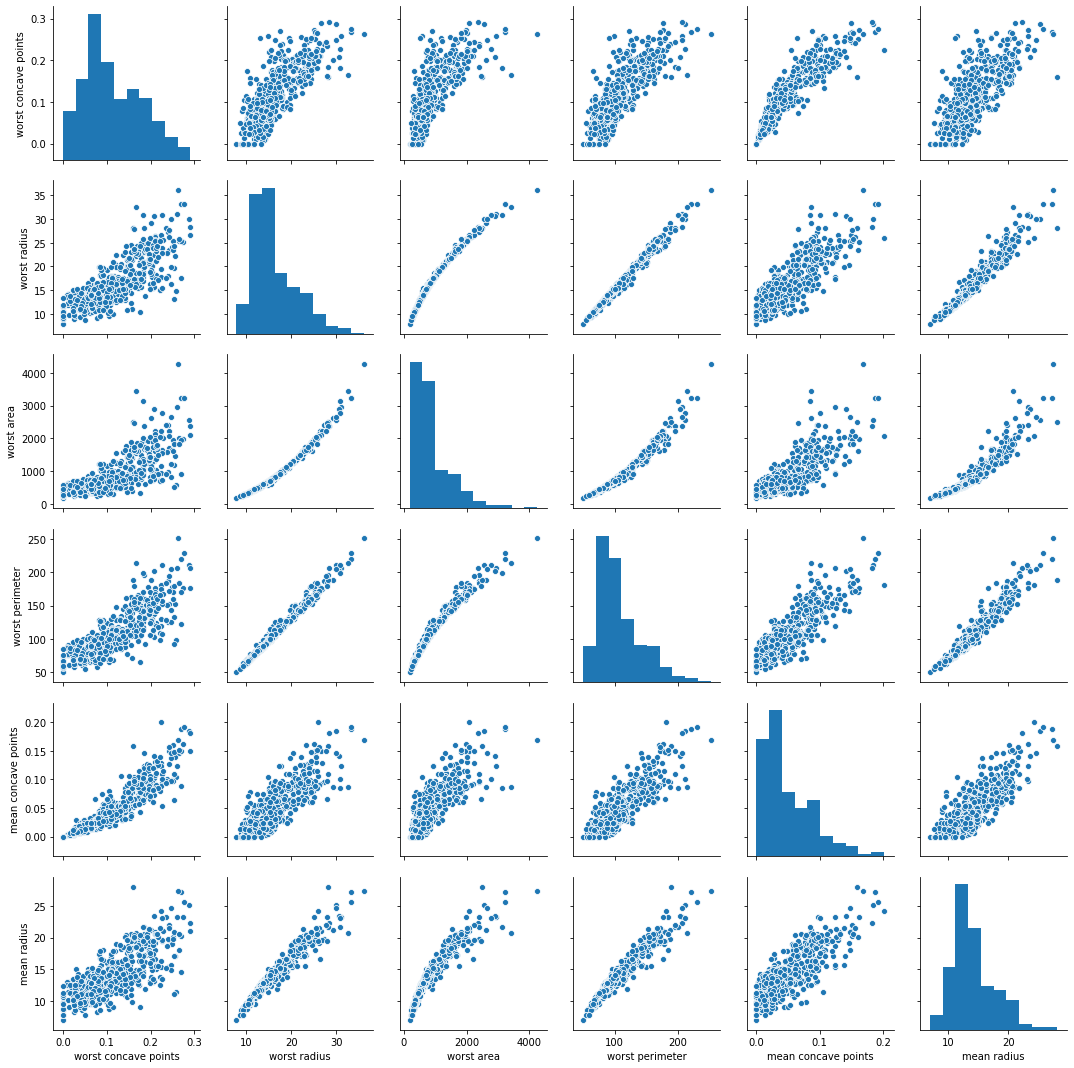

In [16]:
import pandas

cancer_csv = '../dataset/BreastCancer/cancer.csv';
arr = np.append(cancer.feature_names, 'index')
data2 = pandas.read_csv(cancer_csv, names=arr)

newData = data2[
['worst concave points',
 'worst radius',
 'worst area',
 'worst perimeter',
 'mean concave points',
 'mean radius'
]
]

g =  sb.pairplot(newData, kind="scatter", dropna=True)
plt.show()

## Multi-layer perceptron (MLP)
Multi-layer perceptron is an supervised learning algorithm in Machine Learning. As other algorithms, it trys to learn a function by apply training on the dataset. MLP is considered as subset of deep learning or deep neural networks. 
It has three main components: 
- input layer: which oftenly equals to all features of the dataset.
- hidden layers
- output layer: which can be one node(perceptron) or equals to the dataset labels in case of using _softmax_ function which is used in scikit learn MLPClassifier, means we have output nodes equals to dataset labels.

### Activation Function 
In order to get the output values of nodes in layer Y, we apply the activation function on the previous layer inputs (X) and the Weights (W).

Most popular types of Activation functions are:
- Sigmoid or Logistic
- Tanh — Hyperbolic tangent
- ReLu -Rectified linear units, which has been proved that it's much better than the others and is used in most modern ML models.


In [17]:
cancer = load_breast_cancer();

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# one hot encoding
Y_train_OneHot = np.eye(2)[y_train]
Y_test_OneHot = np.eye(2)[y_test]

#act: logistic   , alpha:  0.0316227766017 , layers:  [5, 5] , solver:  lbfgs
clf = MLPClassifier(hidden_layer_sizes=(10,3), solver='lbfgs', batch_size=4, alpha =1,max_iter=200, shuffle=True)

print(clf)

MLPClassifier(activation='relu', alpha=1, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


### Fitting the classifer and plotting the results

Number of layers:  4
Number of outputs:  2
Values of bias: [array([ 0.20457361, -0.27320588, -0.05957539,  0.14915336, -0.24870746,
        0.19702052,  0.30282434,  0.06438949,  0.24879708,  0.22506963]), array([-0.627497  ,  0.11186529,  0.13177487]), array([0.28955635, 0.16089091])]
Train accuracy:  0.2021978021978022  test accuracy: 0.20175438596491227


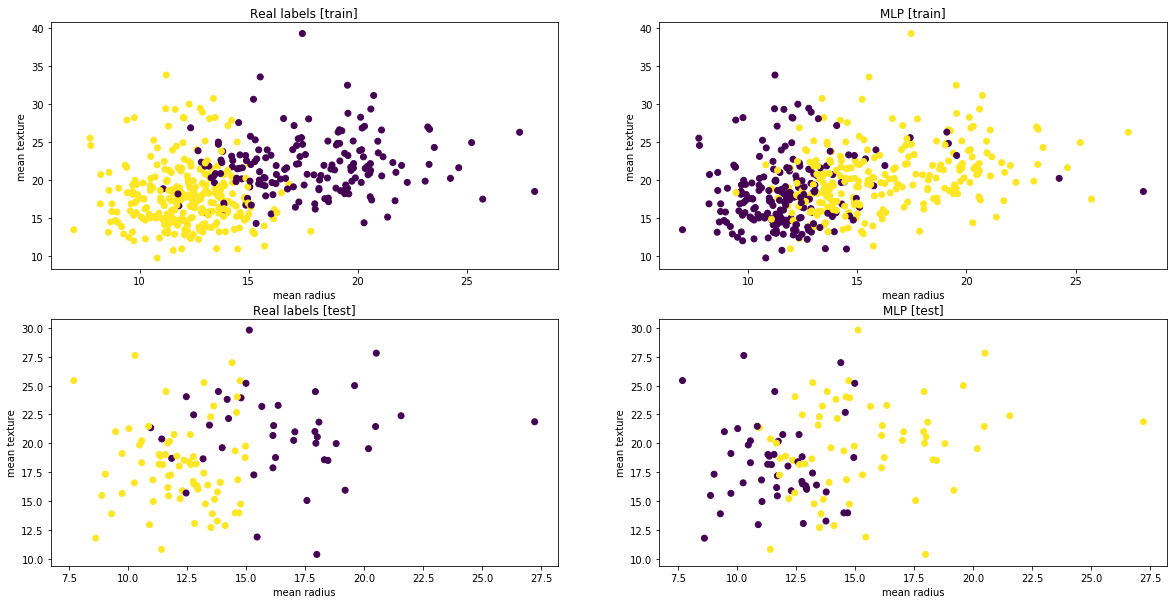

In [18]:
clf.fit(X_train, Y_train_OneHot)
print("Number of layers: ", clf.n_layers_)
print("Number of outputs: ", clf.n_outputs_)
print("Values of bias:",clf.intercepts_ )

h_train_pred = np.argmax(clf.predict(X_train), axis=1)
h_test_pred = np.argmax(clf.predict(X_test), axis=1)

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title("Real labels [train]")

plt.subplot(2, 2, 2)
plt.scatter(X_train[:,0], X_train[:,1], c=h_train_pred)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title("MLP [train]")

plt.subplot(2, 2, 3)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.title("Real labels [test]")

plt.subplot(2, 2, 4)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.scatter(X_test[:,0], X_test[:,1], c=h_test_pred)
plt.title("MLP [test]");

print("Train accuracy: ", clf.score(X_train, Y_train_OneHot), " test accuracy:", clf.score(X_test,Y_test_OneHot))

## Support Vector Machine
SVM is one the most common supervised learning algorithms. Basically, the algorithm tries to draw a line (straigh or non-straigh) in order to seperate the data into subsets. 

So in this dataset the classifier tries to seperate the _benign_ and _malignant_ samples from each others by a line.

We will create a SVM Classifier object and fit it with the first two features and plot it. 

/home/tamer/Projects/breast-cancer-ecoli-classification/environment/py36/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/tamer/Projects/breast-cancer-ecoli-classification/environment/py36/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/tamer/Projects/breast-cancer-ecoli-classification/environment/py36/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma 

Text(0.5, 1.0, 'sigmoid Kernel')

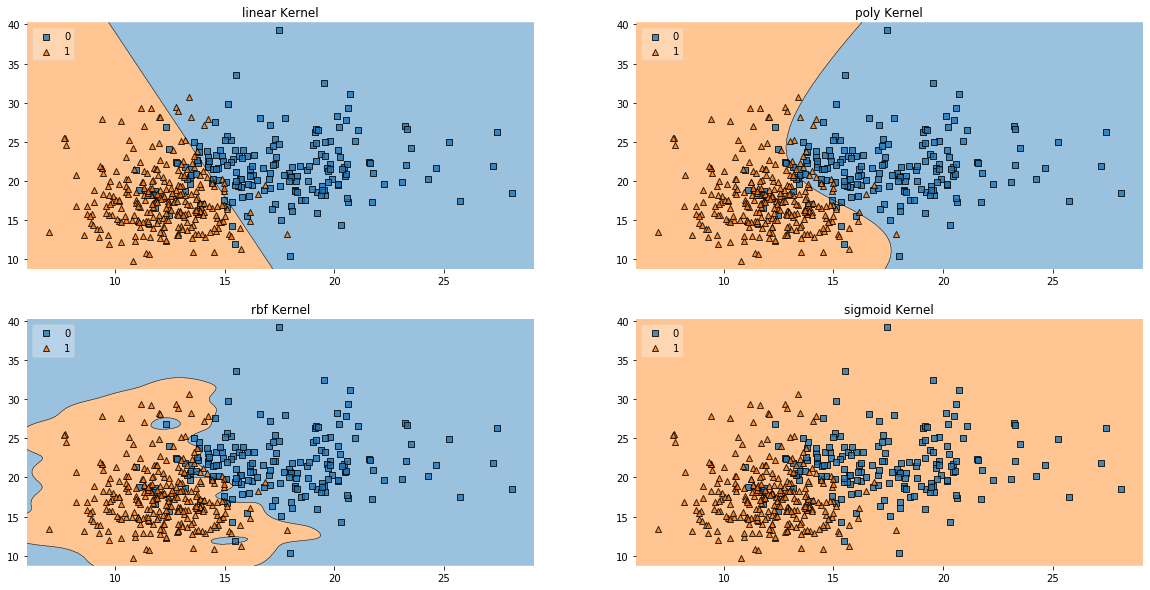

In [20]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

cancer = load_breast_cancer();
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.20)


plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
model = SVC(kernel='linear', C=1e1)
X = X_train[:,[0,1]]
model.fit(X, Y_train)
plot_decision_regions(X=X, y=Y_train,clf=model,legend=2)
plt.title("linear Kernel")

plt.subplot(2, 2, 2)
model = SVC(kernel='poly', C=1e1)
X = X_train[:,[0,1]]
model.fit(X, Y_train)
plot_decision_regions(X=X, y=Y_train,clf=model,legend=2)
plt.title("poly Kernel")

plt.subplot(2, 2, 3)
model = SVC(kernel='rbf', C=1e1)
X = X_train[:,[0,1]]
model.fit(X, Y_train)
plot_decision_regions(X=X, y=Y_train,clf=model,legend=2)
plt.title("rbf Kernel")

plt.subplot(2, 2, 4)
model = SVC(kernel='sigmoid', C=1e1)
X = X_train[:,[0,1]]
model.fit(X, Y_train)
plot_decision_regions(X=X, y=Y_train,clf=model,legend=2)
plt.title("sigmoid Kernel")


Now lets try to fit the model with all the features and then print the score of training and testing datasets. 

_Note_: applying 'poly' kernel takes long time in case of taking all X_train.

In [21]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

cancer = load_breast_cancer();
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.20)

model = SVC(kernel='rbf', C=1e1)
model.fit(X_train, Y_train)
print("Train accuracy: ", model.score(X_train, Y_train), " test accuracy:", model.score(X_test,Y_test))

Train accuracy:  1.0  test accuracy: 0.5877192982456141


/home/tamer/Projects/breast-cancer-ecoli-classification/environment/py36/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Decision Tree Classification 



In [22]:
from sklearn import tree

cancer = load_breast_cancer();
X_train, X_test, Y_train,Y_test = train_test_split(cancer.data,cancer.target,test_size=0.25)

classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)

Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)

print('Score: {}'.format(classifier.score(X_train, Y_train)))
print('Score: {}'.format(classifier.score(X_test, Y_test)))

Score: 1.0
Score: 0.9090909090909091


### Visualize Decision Tree
Using '_graphviz_' we can have a png picture of the decision tree that the classifier build after fitting the model.

In [29]:
import pydotplus
import graphviz
import collections

dot_data = tree.export_graphviz(classifier,
                                feature_names=cancer.feature_names,
                                out_file=None,
                                filled=True
                                )

graph = pydotplus.graph_from_dot_data(dot_data)
 
colors = ('orange', 'green')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
 
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
 
graph.write_png('breast_cancer_dt.png')

True

![title](breast_cancer_dt.png)